#### **Exercise 1:**
Create a function returning the first N terms of the tailor series of the function without using the sympy series function.

In [37]:
import math
import sympy as sp
import numpy as np

In [42]:
# %%timeit
def function(n):
    h = sp.symbols('h')
    x = sp.symbols('x')
    i = 0
    expr = 0
    for i in range(n):
        expr = expr + ((-h +x)**i/math.factorial(i))*sp.diff(sp.sin(x),x,i).subs(x,h)
     
    #return function(n)
    return expr
sp.init_printing(order='rev-lex')   
function(5)

In [39]:
%%timeit
#function(5).series(x,h,5)
h = sp.symbols('h')
x = sp.symbols('x')
sp.sin(x).series(x,h, n=5)

23.2 ms ± 1.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### **Exercise 2:**

Write a matrix multiplication function using lists ("manually", using the matrix multiplication formula) and another one using numpy arrays (call matmul function). Time them both. 

In [30]:
# %%timeit
import numpy as np
def my_mult(m1,m2,N):
    m3=[0 for i in range(N*N)]
    for i in range(N):
        for j in range(N):
            for k in range(N):
                m3[i*N+j]=m3[i*N+j]+m1[i*N+k]*m2[k*N+j]
    return m3

In [31]:
N=5
matr1=list(range(N*N))
matr2=list(range(N*N))

In [32]:
my_mult(matr1,matr2,N)

In [33]:
%%timeit
matr3=my_mult(matr1,matr2,N)

31.4 µs ± 1.36 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


#### **Execrise 3:**

Consider the following example. Change functions in it to plot something different from `sin` in each panel. Add x and y labels to each panel. Experiment till this looks nice enough for an article. Save the output. 

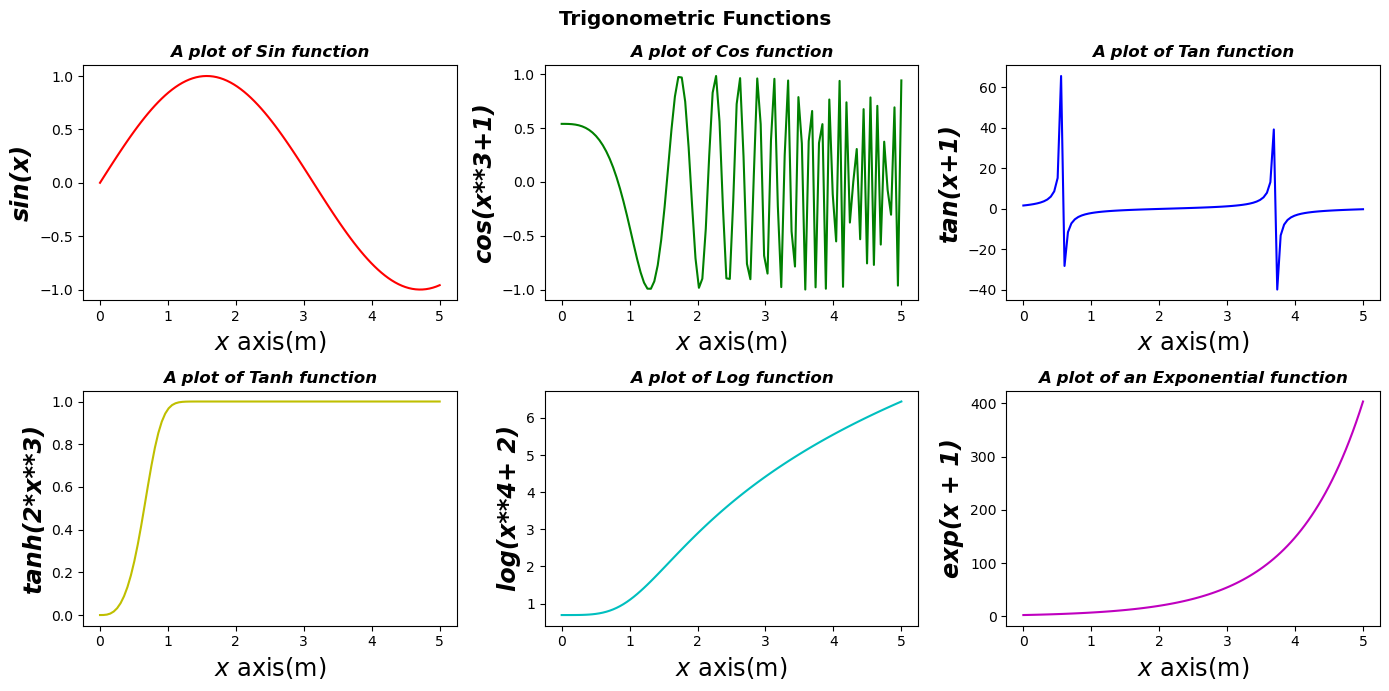

In [35]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0,5,100)
y1 = np.sin(x)
y2 = np.cos(x**3+1)
y3 = np.tan(x+1)
y4 = np.tanh(2*x**3)
y5 = np.log(x**4+ 2)
y6 = np.exp(x + 1)

# now we decide the actual figure size in inches
fig = plt.figure(figsize=(14,7))

plt.suptitle('Trigonometric Functions',fontweight='bold', fontsize='x-large')
plt.subplots_adjust(hspace=0.3, top=0.8) 
# create subplots 231 means make a 2x3 grid and this is the first plot

plt.subplot(231)
#these are here to show that you can do the same here as for a single plot
plt.title('A plot of Sin function',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('sin(x)',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('$x$ axis(m)',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y1,color='r')

plt.subplot(232)
plt.title('A plot of Cos function',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('cos(x**3+1)',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('$x$ axis(m)',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y2,color='g')

plt.subplot(233)
plt.title('A plot of Tan function',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('tan(x+1)',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('$x$ axis(m)',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y3,color='b')

plt.subplot(234)
plt.title('A plot of Tanh function',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('tanh(2*x**3)',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('$x$ axis(m)',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y4,color='y')

plt.subplot(235)
plt.title('A plot of Log function',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('log(x**4+ 2)',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('$x$ axis(m)',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y5,color='c')

plt.subplot(236)
plt.title('A plot of an Exponential function',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('exp(x + 1)',fontsize = 'xx-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('$x$ axis(m)',fontsize = 'xx-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y6,color='m')
# removed extra white space
plt.tight_layout()
#plt.show()

#### **Exercise 4:**
Plot the recaman sequence in the following way:

Add a semi-circular arc from $a_{n}$ to $a_{n-1}$.

Alternate the arcs to be above and below the x-axis according to whether
    n is even or odd.

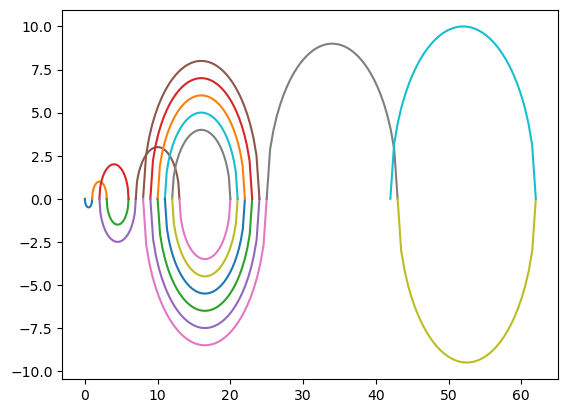

In [36]:
def Sequence(N):
    list = [0]
    i = 1
    while(i<N+1):
        a = list[i - 1] -i
        if a  > 0 and a not in list: 
           list.append(list[i - 1] -i)
        else:
            list.append(list[i - 1] +i)
        i = i +1     # n += 1
    return list
seq = Sequence(20)
for i in range(1, len(seq)):
    h = (seq[i] + seq[i-1])/2
    r = abs((seq[i] - seq[i-1]))/2
    x = np.linspace(seq[i], seq[i-1], 40)
    y = (-1)**i * np.sqrt(r**2 - (x-h)**2)
    plt.plot(x, y)

#### **Exercise5:**

Plot a rainbow. Use your imagination and google to make it beautiful.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from matplotlib.cm import get_cmap
import matplotlib.patches as patches

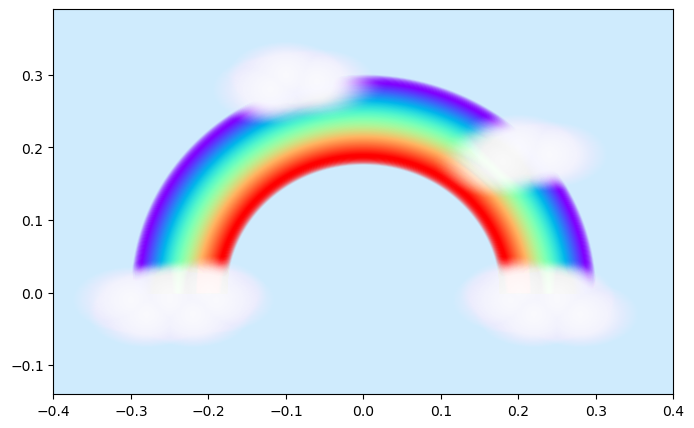

In [45]:
def draw_cloud(center):
    
    radius = 0.005
    num_ellipses = 100
    alpha = 0.15

    for i in range(100):
        ellipse = patches.Ellipse(center, radius * (0.8 + i * 0.01), radius, color='white', alpha=alpha, zorder=100 - i)
        ax.add_patch(ellipse)
        radius += 0.001
        alpha -= 0.0015
        
cmap = plt.get_cmap('rainbow', 100)
fig, ax = plt.subplots(figsize=(8,5)) 
theta = np.linspace(0, np.pi, 100)
radius = 0.3  
al=0.0
for i in range (10):
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    plt.plot(x, y, color=cmap(0),alpha=al)
    radius-=0.0012
    al+=0.1
for i in range (100):
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    plt.plot(x, y, color=cmap(i))
    radius-=0.001
al=1
for i in range (10):
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    plt.plot(x, y, color=cmap(100),alpha=al)
    radius-=0.0012
    al-=0.1
    
draw_cloud((-0.2,0))
draw_cloud((-0.19,-0.01))
draw_cloud((-0.25,-0.005))
draw_cloud((-0.25,-0.01))
draw_cloud((-0.30,-0.01))
draw_cloud((-0.28,-0.03))
draw_cloud((-0.22,-0.03))

draw_cloud((0.2,0))
draw_cloud((0.19,-0.01))
draw_cloud((0.25,-0.005))
draw_cloud((0.25,-0.01))
draw_cloud((0.28,-0.03))
draw_cloud((0.22,-0.03))

draw_cloud((-0.1,0.3))
draw_cloud((-0.12,0.28))
draw_cloud((-0.06,0.29))

draw_cloud((-0.1+0.3,0.3-0.1))
draw_cloud((-0.12+0.3,0.28-0.1))
draw_cloud((-0.06+0.3,0.29-0.1))

ax.axhspan(-0.15,0.4, facecolor='lightskyblue', alpha=0.4)  # Blue for y >= 0
plt.ylim([-0.14,0.39])
plt.xlim([-0.4,0.4])
plt.show()

#### **Exercise6**

Plot a nice-looking 3-D torus. Do this 3 times with different styles. 

Text(0.5, 0.92, 'Still surface, but weird')

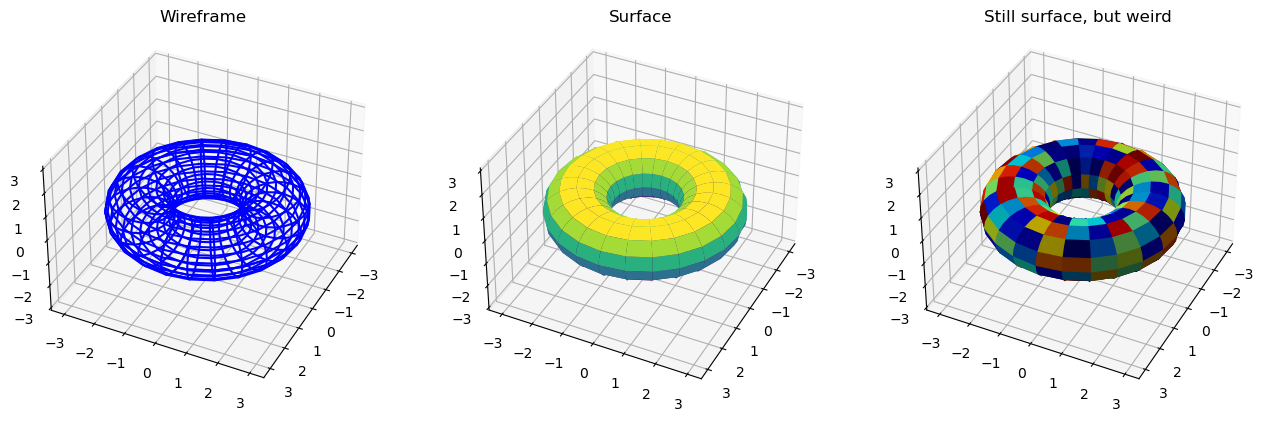

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Function to generate 3D torus coordinates
def generate_torus(R, r, theta, phi):
    x = (R + r * np.cos(phi)) * np.cos(theta)
    y = (R + r * np.cos(phi)) * np.sin(theta)
    z = r * np.sin(phi)
    return x, y, z

# Torus parameters
n_plot_points=25
R = 2  # Major radius
r = 1  # Minor radius
theta = np.linspace(0, 2 * np.pi, n_plot_points)
phi = np.linspace(0, 2 * np.pi, n_plot_points)
theta, phi = np.meshgrid(theta, phi)

# Style 1: Wireframe
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(131, projection='3d')
x, y, z = generate_torus(R, r, theta, phi)
ax.set_zlim(-3,3)
ax.view_init(36, 26)
ax.plot_wireframe(x,y,z, color="#0000FF")

ax.set_title('Wireframe')

# Style 2: Surface
ax = fig.add_subplot(132, projection='3d')
x, y, z = generate_torus(R, r, theta, phi)
ax.set_zlim(-3,3)
ax.view_init(37, 26)
my_col = cm.jet(np.random.rand(z.shape[0],z.shape[1]))
# available colormaps are here -  https://matplotlib.org/stable/tutorials/colors/colormaps.html
ax.plot_surface(x,y,z,rstride=2,cstride=1,cmap='viridis')
ax.set_title('Surface')

# Style 3: used the same, but changed colormap
ax = fig.add_subplot(133, projection='3d')
x, y, z = generate_torus(R, r, theta, phi)
ax.set_zlim(-3,3)
ax.view_init(37, 26)
#example of how to contol colormaps with weird stuff
my_col = cm.jet(np.random.rand(z.shape[0],z.shape[1]))
ax.plot_surface(x,y,z,rstride=2,cstride=1,facecolors = my_col)
ax.set_title('Still surface, but weird')

Text(0.5, 0.92, 'Wireframe')

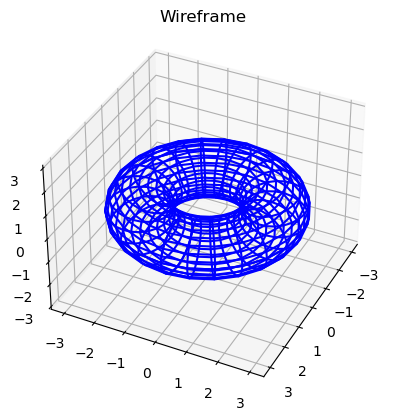

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Function to generate 3D torus coordinates
def generate_torus(R, r, theta, phi):
    x = (R + r * np.cos(phi)) * np.cos(theta)
    y = (R + r * np.cos(phi)) * np.sin(theta)
    z = r * np.sin(phi)
    return x, y, z
# Torus parameters
n_plot_points=25
R = 2  # Major radius
r = 1  # Minor radius
theta = np.linspace(0, 2 * np.pi, n_plot_points)
phi = np.linspace(0, 2 * np.pi, n_plot_points)
theta, phi = np.meshgrid(theta, phi)

# Style 1: Wireframe
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(131, projection='3d')
x, y, z = generate_torus(R, r, theta, phi)
ax.set_zlim(-3,3)
ax.view_init(36, 26)
ax.plot_wireframe(x,y,z, color="#0000FF")

ax.set_title('Wireframe')
